# STEP BY STEP VISUALIZATION SUMMARY: 
1. Domain Analysis Of all features
2. Univariate Analysis with insights
3. Bivariate Analysis with insights
4. Multivariat Analysis with insights

# IMPORTING ALL NECESSAERY LIBRARY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')  # setting up background
from scipy import stats

# TO avoid warnings
import warnings 
warnings.filterwarnings('ignore')

# LOADING DATA FOR VISUALIZATION

In [3]:
path = "signal_path_loss_data.csv"
data = pd.read_csv(path)
pd.set_option('display.max_columns',None) # Used to display the all features

In [4]:
data.head() # Examining the first 5 records in the data set

,Frequency,Distance,Transmitter Height,Receiver Height,Antenna Gain,Environment,Obstacle Distance,Path Characteristics,Weather Conditions,Shadowing Effects,Frequency Bandwidth,Path Loss
0,2171407026,368.853581,42.029355,2.287991,14.207688,rural,46.066300,NLOS,rainy,-3.337696,74850605.86,323.535247
1,2557607817,145.408870,27.104702,2.348117,19.149884,urban,4.217460,LOS,rainy,3.208956,32638686.66,302.101929
2,3581872487,60.766213,35.515670,3.815246,17.524410,urban,51.372558,LOS,rainy,-2.924875,58257317.08,306.735772
3,1868877541,206.794088,42.936580,5.319497,16.790897,urban,59.819078,LOS,rainy,-1.941350,67333241.06,319.448295
4,1119490401,186.455720,40.528642,9.723401,9.560728,suburban,54.458540,NLOS,clear,-2.907063,71146062.37,344.803098


In [39]:
data.tail() # Examining the last 5 records in the data set

,Frequency,Distance,Transmitter Height,Receiver Height,Antenna Gain,Environment,Obstacle Distance,Path Characteristics,Weather Conditions,Shadowing Effects,Frequency Bandwidth,Path Loss
6754,1650232202,282.925846,2.033956,5.910539,14.073015,suburban,25.459578,LOS,rainy,-8.715335,65722337.70,277.918465
6755,5816265095,276.111922,17.641787,6.849947,16.075043,rural,21.660008,LOS,clear,4.430261,89629750.56,295.804923
6756,5872071319,488.043983,38.003737,6.347916,13.637978,suburban,89.033806,LOS,clear,-0.326245,83385812.75,330.944234
6757,1147596786,104.656770,46.507039,8.184545,14.869183,suburban,57.766908,LOS,foggy,1.778606,74720130.13,314.621889
6758,4916158459,53.857339,24.012735,8.559757,18.560756,urban,60.636588,LOS,rainy,3.791809,52779764.68,318.234863


In [5]:
# indepth exploration to have more insight about the data set
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6759 entries, 0 to 6758
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Frequency             6759 non-null   int64  
 1   Distance              6759 non-null   float64
 2   Transmitter Height    6759 non-null   float64
 3   Receiver Height       6759 non-null   float64
 4   Antenna Gain          6759 non-null   float64
 5   Environment           6759 non-null   object 
 6   Obstacle Distance     6759 non-null   float64
 7   Path Characteristics  6759 non-null   object 
 8   Weather Conditions    6759 non-null   object 
 9   Shadowing Effects     6759 non-null   float64
 10  Frequency Bandwidth   6759 non-null   float64
 11  Path Loss             6759 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 633.8+ KB


In [7]:
data.columns

Index(['Frequency', 'Distance', 'Transmitter Height', 'Receiver Height',
       'Antenna Gain', 'Environment', 'Obstacle Distance',
       'Path Characteristics', 'Weather Conditions', 'Shadowing Effects',
       'Frequency Bandwidth', 'Path Loss'],
      dtype='object')


1. **Frequency**: This could represent the frequency at which a wireless communication system operates, measured in Hertz (Hz). It indicates the rate at which the signal oscillates.

2. **Distance**: This likely represents the distance between the transmitter and receiver in the communication system, measured in meters.

3. **Transmitter Height**: The height of the transmitter antenna above ground level, measured in meters. This can affect the signal coverage and propagation characteristics.

4. **Receiver Height**: Similarly, this represents the height of the receiver antenna above ground level, also measured in meters.

5. **Antenna Gain**: This refers to the gain of the antennas used in the communication system, indicating their ability to focus or direct signal strength, typically measured in decibels (dB).

6. **Environment**: This feature may describe the environment in which the communication system operates, such as urban, suburban, or rural areas, which can influence signal propagation and interference.

7. **Obstacle Distance**: This likely represents the distance between the transmitter/receiver and any obstacles in the communication path, measured in meters.

8. **Path Characteristics**: This feature may describe the characteristics of the communication path, such as line-of-sight (LOS), non-line-of-sight (NLOS), or multipath propagation, which affect signal propagation and attenuation.

9. **Weather Conditions**: This could describe the prevailing weather conditions during the communication, such as rain, fog, or clear sky, which can impact signal attenuation and reliability.

10. **Shadowing Effects**: This likely represents the effects of signal attenuation due to obstacles or environmental conditions, measured in decibels (dB).

11. **Frequency Bandwidth**: This refers to the range of frequencies over which the communication system operates, measured in Hertz (Hz).

12. **Path Loss**: Path loss represents the reduction in signal strength as it travels through the communication path, typically measured in decibels (dB).

These features are crucial in analyzing and modeling wireless communication systems, as they provide insights into the factors affecting signal propagation, attenuation, and reliability. They play a significant role in optimizing the performance and efficiency of communication systems in various environments and conditions.


# UNIVARIATE ANALYSIS

Univariate analysis is a statistical method used in data analysis to examine and understand the characteristics and distribution of a single variable or feature in isolation. It focuses on one variable at a time and aims to provide insights into its distribution, central tendencies, variability, and other descriptive statistics. 

In [10]:
list(data.Frequency)

[2171407026,
 2557607817,
 3581872487,
 1868877541,
 1119490401,
 4783853105,
 1150394519,
 1880494966,
 5502241174,
 2593119208,
 3278036264,
 3273537080,
 4429726164,
 2795233806,
 1410506752,
 3307291496,
 5648082076,
 2084871274,
 2662729317,
 2555894780,
 3444367804,
 1687843470,
 3212616022,
 5748189216,
 1956778920,
 5281016354,
 1472197593,
 5335031815,
 1095722513,
 3144904880,
 4135195404,
 3768471337,
 3564758817,
 5247690312,
 2551946059,
 1758622088,
 4217301371,
 3687823659,
 4417422615,
 2773162068,
 1134578500,
 1155992560,
 3994031250,
 3221565586,
 4654967313,
 2875283453,
 1430955890,
 5389064144,
 5563630368,
 1229487524,
 2802380548,
 4306974180,
 4860800671,
 4212888040,
 4073604369,
 3350594532,
 3085015412,
 2450671610,
 5049024101,
 3447548886,
 3259160317,
 2812522835,
 1463099824,
 5559014462,
 1942654909,
 2783119802,
 3233007603,
 2871182310,
 2785171031,
 4977040866,
 3843179179,
 5837339161,
 4671073816,
 3107648463,
 1397108292,
 4031791270,
 1766643282,

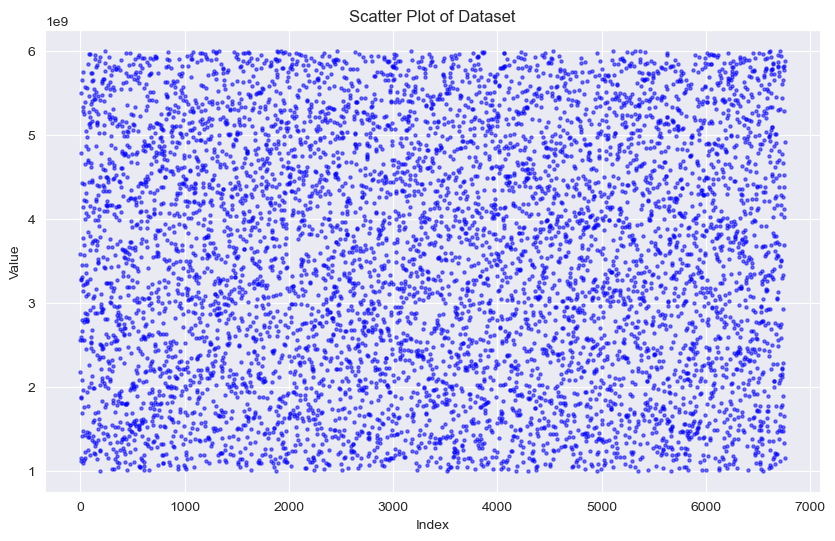

In [12]:
# Plotting the data
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(range(len(data.Frequency)), data.Frequency, s=5, color='blue', alpha=0.5)
plt.title('Scatter Plot of Dataset')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [14]:
list(data.Distance)

[368.8535812,
 145.4088698,
 60.7662126,
 206.7940881,
 186.4557204,
 83.02046334,
 354.349686,
 136.1959631,
 305.5759062,
 70.12286549,
 23.19697298,
 453.1143045,
 204.5133601,
 335.3289724,
 84.03775451,
 429.2210083,
 299.2773415,
 257.7513116,
 328.9374983,
 255.022865,
 417.4408901,
 81.77054504,
 497.9773265,
 131.2435303,
 352.5454479,
 243.4334573,
 153.3327209,
 446.8027191,
 150.6616809,
 62.04144285,
 454.0617861,
 17.94265426,
 128.3618723,
 144.3885419,
 403.5783177,
 199.8171859,
 482.9667747,
 475.4275475,
 331.2015227,
 308.322499,
 167.1218021,
 393.0992647,
 187.9697472,
 200.8297136,
 308.2472897,
 418.4004066,
 448.3050604,
 407.3845122,
 134.9483864,
 134.4598498,
 336.1007612,
 459.7280323,
 432.1182308,
 196.4139423,
 350.9637888,
 22.79384383,
 44.16251991,
 386.4106865,
 418.3240265,
 321.0555349,
 338.8556024,
 395.2543201,
 70.70543585,
 205.5285498,
 319.3109307,
 386.7018412,
 177.4142167,
 306.0761231,
 375.3562468,
 367.1854453,
 307.4145676,
 82.181852

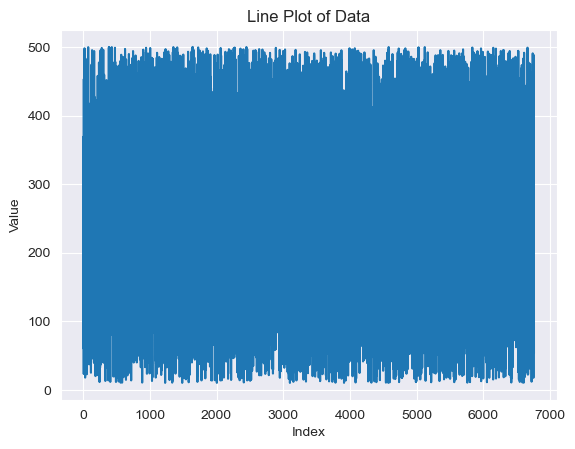

In [15]:
plt.plot(list(data.Distance))
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of Data')
plt.show()

# USE SUBPLOT TO PLOTS MULTIPLE FEATURE

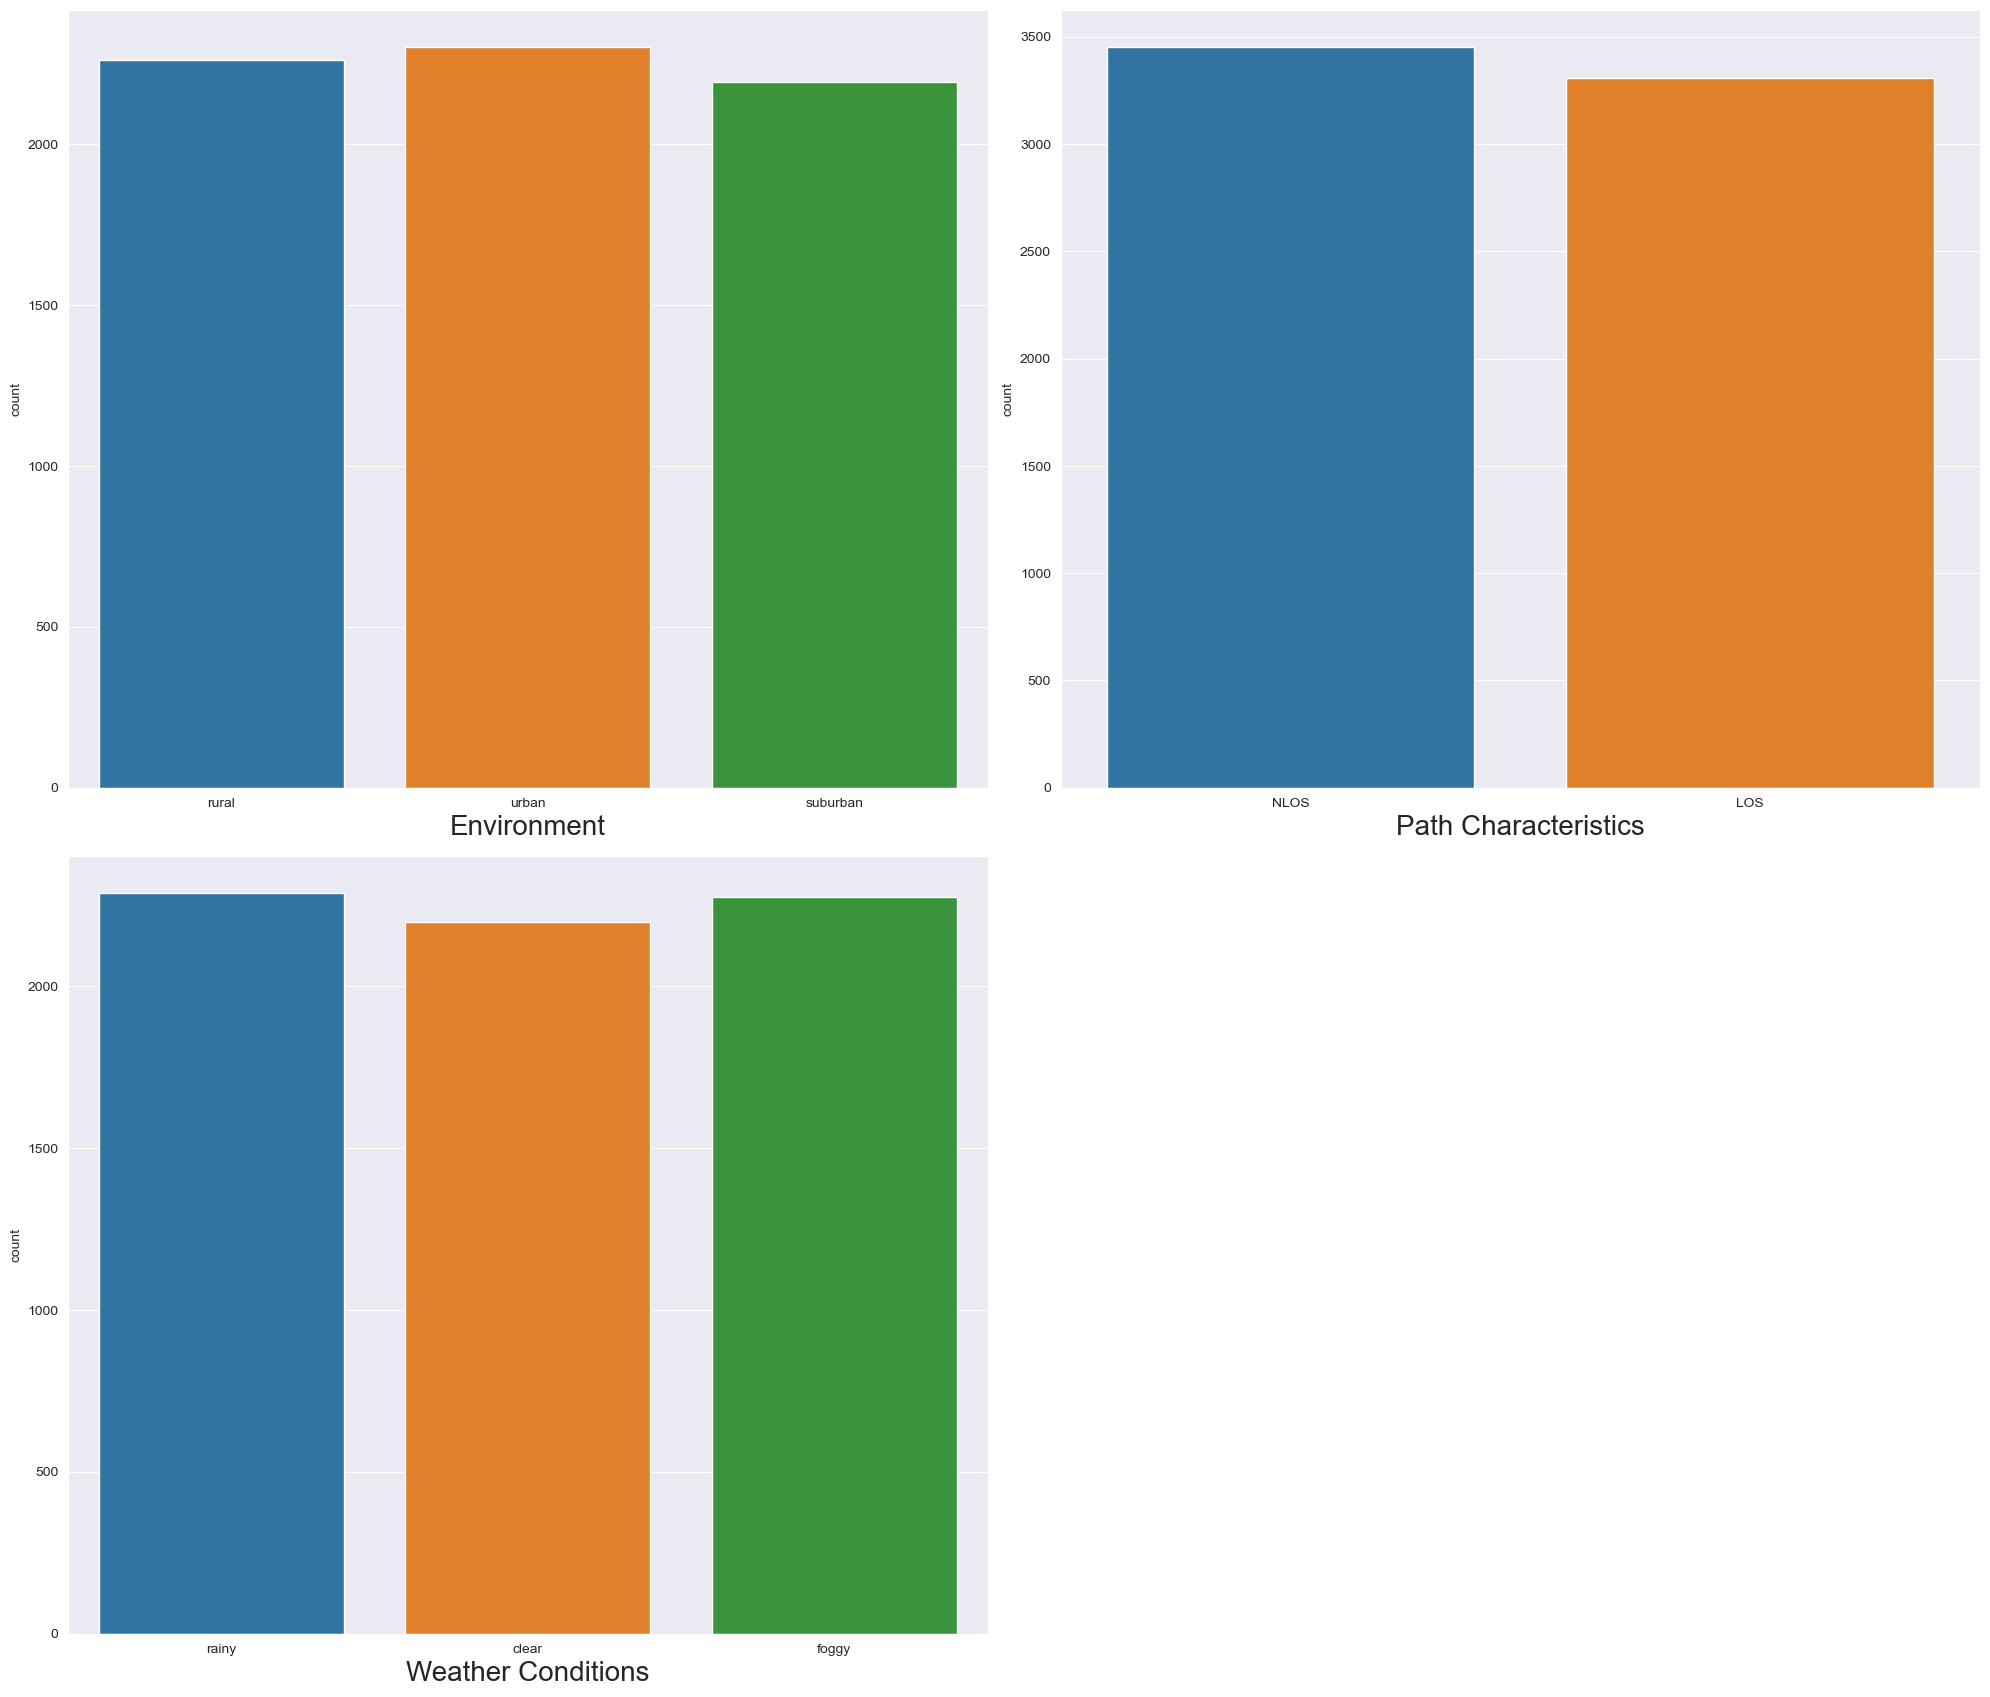

In [27]:
count = data[['Environment', 'Path Characteristics', 'Weather Conditions']] # making lsit of next 12 feature

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in count: # iteration of columns / acessing the columns from count 
    if plotno<=6:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=count[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

# Observation:

# BIAVARIATE ANALYSIS

To perform bivariate analysis, you typically combine two features to understand the relationship between them. Here are some potential feature combinations from the given dataset:

1. **Distance and Path Loss**: Analyzing how path loss changes with distance can provide insights into the attenuation of the signal over varying distances.

2. **Transmitter Height and Receiver Height**: Understanding the relationship between transmitter and receiver heights can help determine the impact of antenna elevation on signal propagation.

3. **Environment and Signal Strength (Path Loss)**: Comparing signal strength (path loss) across different environments (urban, rural, suburban) can reveal how environmental factors affect signal propagation.

4. **Obstacle Distance and Path Loss**: Investigating how path loss varies with obstacle distance can highlight the influence of obstacles on signal attenuation.

5. **Frequency and Path Loss**: Examining how path loss changes with frequency can show frequency-dependent effects on signal propagation.

6. **Weather Conditions and Signal Strength (Path Loss)**: Exploring how signal strength (path loss) varies under different weather conditions can demonstrate the impact of weather on signal propagation.

7. **Frequency Bandwidth and Data Transmission Rate**: Analyzing the relationship between frequency bandwidth and data transmission rate can reveal the bandwidth utilization efficiency.

8. **Antenna Gain and Signal Strength (Path Loss)**: Investigating how signal strength (path loss) changes with antenna gain can elucidate the role of antenna characteristics in signal reception.

These are just a few examples of feature combinations for bivariate analysis. The choice of which features to analyze together depends on the specific research questions or hypotheses of interest.

1. **Distance and Path Loss**: Analyzing how path loss changes with distance can provide insights into the attenuation of the signal over varying distances.

In [30]:
path_loss = list(data['Path Loss'])

distance = list(data.Distance)

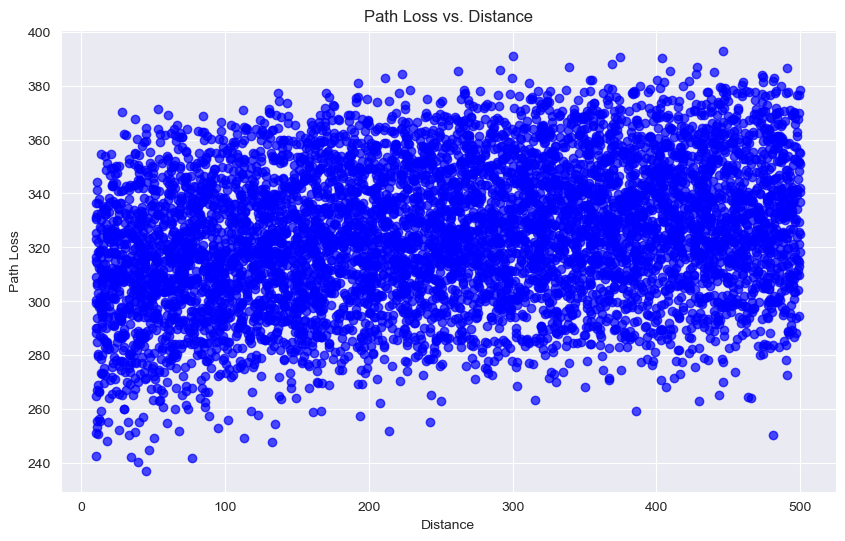

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(distance, path_loss, color='blue', alpha=0.7)
plt.title('Path Loss vs. Distance')
plt.xlabel('Distance')
plt.ylabel('Path Loss')
plt.grid(True)
plt.show()

 The scatter plot visualizes the relationship between path loss and distance in a communication system. Here's how to interpret it:

1. **X-axis (Distance)**: The horizontal axis represents the distance between the transmitter and the receiver. Each point on the x-axis corresponds to a specific distance value.

2. **Y-axis (Path Loss)**: The vertical axis represents the path loss experienced by the signal as it travels from the transmitter to the receiver. Path loss is the reduction in signal strength caused by various factors such as distance, obstacles, and environmental conditions.

3. **Data Points**: Each data point on the plot represents a pair of distance and path loss values from the dataset. For example, the first data point might correspond to a distance of 368.85 units and a path loss of 323.54 units.

4. **Trend**: By examining the overall pattern of the data points, you can observe any trends or patterns in how path loss changes with distance. Typically, as distance increases, path loss also tends to increase, indicating that the signal strength decreases with greater distance from the transmitter.

5. **Variability**: The spread or clustering of data points around the trend line provides insight into the variability of path loss at different distances. A wider spread suggests more variability in path loss, possibly due to environmental factors or obstacles in the signal path.

6. **Analysis**: From the graph, you can analyze the rate at which path loss increases with distance. Steeper slopes indicate faster attenuation of the signal over distance, while shallower slopes indicate slower attenuation.

In summary, this scatter plot helps visualize the relationship between distance and path loss, providing valuable insights into signal propagation characteristics in the communication system under consideration.

2. **Transmitter Height and Receiver Height**: Understanding the relationship between transmitter and receiver heights can help determine the impact of antenna elevation on signal propagation.

In [34]:
t_height = list(data['Transmitter Height'])

r_height = list(data['Receiver Height'])

In [35]:
t_height

[42.02935459,
 27.10470246,
 35.51567003,
 42.93657958,
 40.52864226,
 36.25178197,
 18.24944169,
 32.35403181,
 28.95585961,
 40.71165045,
 30.5725929,
 21.47150508,
 24.93839042,
 21.96532055,
 46.02821073,
 45.49678741,
 22.5464003,
 38.92017571,
 20.89596017,
 34.89619405,
 43.7990586,
 12.81367163,
 12.8604321,
 14.59530498,
 12.50401373,
 31.58566047,
 18.06333514,
 47.38433055,
 34.19661662,
 5.763708954,
 5.671134744,
 16.79892715,
 24.33167005,
 19.27533359,
 39.81852081,
 23.8713945,
 26.64381148,
 49.66738805,
 9.060781207,
 8.54131082,
 31.8756998,
 44.22186951,
 30.45520557,
 13.85120156,
 48.92392937,
 39.92827231,
 5.786392958,
 26.77199648,
 37.11788508,
 3.137314479,
 30.36354828,
 8.845663461,
 45.99185791,
 38.90439669,
 2.426850665,
 15.86144259,
 47.84511507,
 8.08377755,
 34.94480245,
 12.47531752,
 7.97256679,
 22.26178265,
 31.23089397,
 33.25354226,
 19.5199663,
 44.11714706,
 42.78002047,
 15.51354614,
 11.72255442,
 28.38981692,
 39.27309714,
 32.82121229,
 2

In [36]:
r_height

[2.287991414,
 2.3481173,
 3.81524586,
 5.319496937,
 9.723401187,
 8.537739015,
 5.628734604,
 5.200133676,
 3.2843385,
 9.239603978,
 9.102648794,
 9.588462822,
 4.795475477,
 8.541775061,
 7.746574142,
 8.087841087,
 3.782091696,
 4.666254004,
 1.997863813,
 2.022570571,
 7.541747492,
 8.198548778,
 7.890330197,
 7.704929314,
 7.310688887,
 7.508377979,
 7.717579741,
 6.999781727,
 8.007722024,
 7.629115037,
 9.199639573,
 2.429152029,
 2.444162397,
 3.511225281,
 6.94099023,
 5.191442101,
 9.23217548,
 2.257265359,
 6.640481188,
 6.239931326,
 8.994616226,
 5.551576531,
 5.178674729,
 5.404828101,
 5.05190539,
 6.367395064,
 7.758757671,
 1.078492158,
 5.427224825,
 9.703763882,
 2.280988581,
 3.410710002,
 9.024033945,
 2.068389562,
 2.765314088,
 4.721739828,
 8.079286981,
 7.392723352,
 2.400054289,
 3.345763527,
 5.015833294,
 1.251812533,
 5.57836722,
 1.609656757,
 2.324872436,
 1.278014241,
 2.440995931,
 1.580218175,
 2.911848294,
 2.227557022,
 7.344987247,
 4.171872066,
 

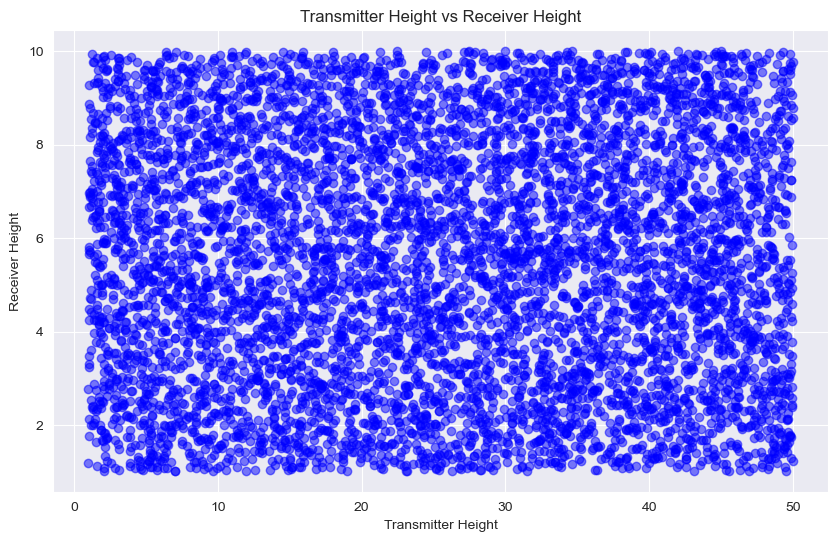

In [37]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(t_height, r_height, color='b', alpha=0.5)
plt.title('Transmitter Height vs Receiver Height')
plt.xlabel('Transmitter Height')
plt.ylabel('Receiver Height')
plt.grid(True)
plt.show()


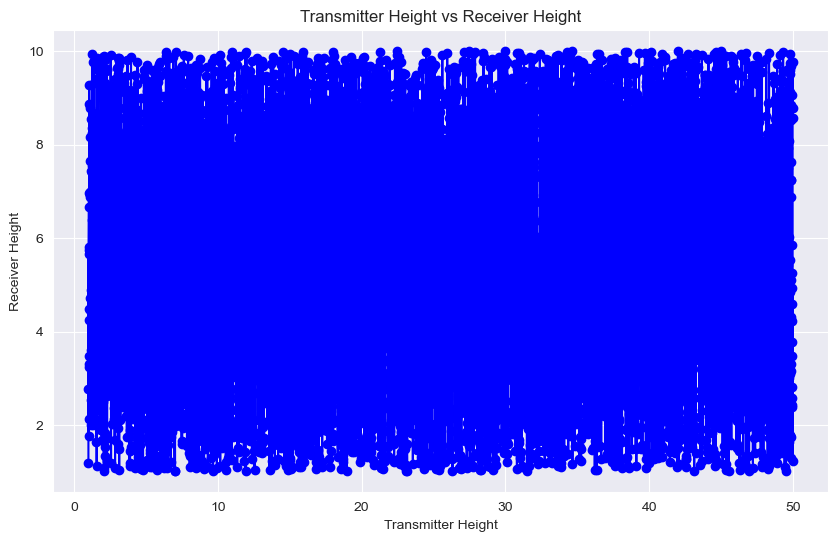

In [38]:
# Sort the data by transmitter height
sorted_indices = sorted(range(len(t_height)), key=lambda i: t_height[i])
t_height_sorted = [t_height[i] for i in sorted_indices]
r_height_sorted = [r_height[i] for i in sorted_indices]

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(t_height_sorted, r_height_sorted, marker='o', linestyle='-', color='b')
plt.title('Transmitter Height vs Receiver Height')
plt.xlabel('Transmitter Height')
plt.ylabel('Receiver Height')
plt.grid(True)
plt.show()

This graph illustrates the relationship between transmitter height and receiver height. Each point on the graph represents a pair of transmitter and receiver heights. The x-axis shows the transmitter height, while the y-axis represents the corresponding receiver height.

By observing the plotted points and the trend of the line connecting them, we can glean insights into how changes in transmitter height affect receiver height and vice versa. If the line slopes upward from left to right, it suggests a positive correlation between transmitter and receiver heights, meaning as one increases, the other tends to increase as well. Conversely, if the line slopes downward, it indicates a negative correlation, where an increase in one height corresponds to a decrease in the other.

Additionally, the spread of the points around the line provides information about the variability or dispersion of the data. A tighter cluster of points suggests a stronger correlation between the heights, while a more scattered distribution indicates a weaker relationship.

Overall, this graph helps in understanding how changes in transmitter height impact receiver height and vice versa, which is crucial for optimizing signal propagation and communication systems.

3. **Environment and Signal Strength (Path Loss)**: Comparing signal strength (path loss) across different environments (urban, rural, suburban) can reveal how environmental factors affect signal propagation.

In [40]:
env = list(data['Environment'])

path_loss = list(data['Path Loss'])

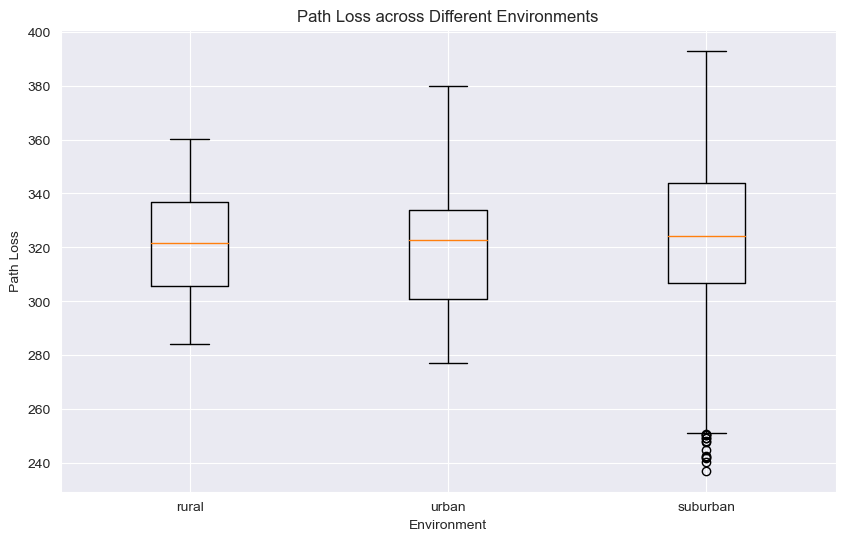

In [43]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot([path_loss[0:20], path_loss[20:60], path_loss[60:]], labels=['rural', 'urban', 'suburban'])
plt.xlabel('Environment')
plt.ylabel('Path Loss')
plt.title('Path Loss across Different Environments')
plt.grid(True)
plt.show()


Looking at the plotted points or the distribution of path loss values for each environment, we can observe the following:

1. **Urban Environment**: The path loss values in urban areas seem to be relatively high, indicating that signal strength tends to degrade more rapidly in urban settings due to factors such as high population density, tall buildings, and other obstructions.

2. **Rural Environment**: Path loss values in rural areas appear to be somewhat lower compared to urban areas. This suggests that signal propagation in rural environments experiences less attenuation, likely due to fewer obstructions and less interference.

3. **Suburban Environment**: The path loss values in suburban areas fall somewhere between urban and rural values. Suburban areas typically have a mix of urban and rural characteristics, with moderate population density and some obstructions, leading to intermediate levels of signal attenuation.



4. **Obstacle Distance and Path Loss**: Investigating how path loss varies with obstacle distance can highlight the influence of obstacles on signal attenuation.

In [44]:
o_distance = list(data['Obstacle Distance'])

path_loss = list(data['Path Loss'])

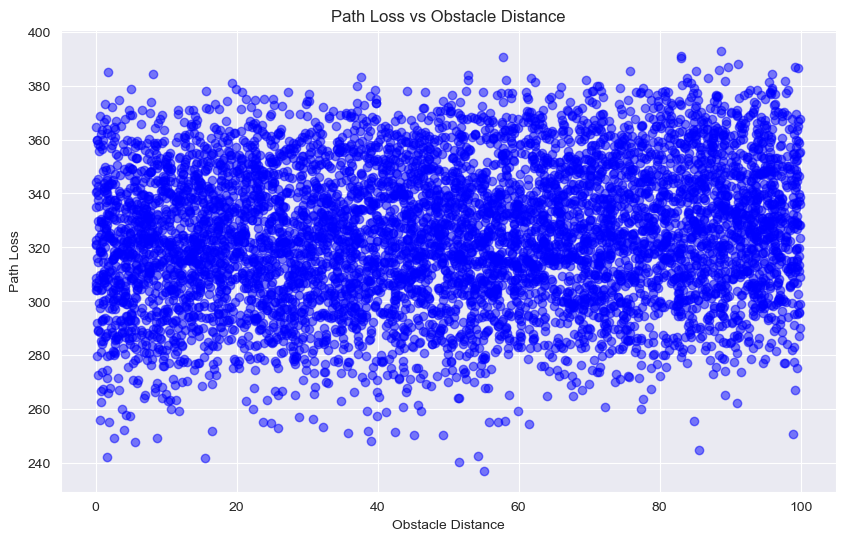

In [47]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(o_distance, path_loss, color='blue', alpha=0.5)
plt.title('Path Loss vs Obstacle Distance')
plt.xlabel('Obstacle Distance')
plt.ylabel('Path Loss')
plt.grid(True)
plt.show()

The scatter plot visualizes the relationship between obstacle distance and path loss. Here's how to interpret the outcome:

1. **Distribution of Points**: Each point on the plot represents a pair of obstacle distance and path loss values from the dataset.

2. **Horizontal Axis (Obstacle Distance)**: The horizontal axis shows the distance between the transmitter and the receiver, considering the presence of obstacles. 

3. **Vertical Axis (Path Loss)**: The vertical axis represents the path loss, which is the reduction in power density of an electromagnetic wave as it propagates through space. In this context, it reflects the attenuation or weakening of the signal strength as it travels from the transmitter to the receiver, influenced by obstacles.

4. **Trend**: Observing the overall trend of the points can provide insights into how path loss changes with respect to obstacle distance. If there's a clear pattern, such as a consistent increase or decrease in path loss as obstacle distance changes, it suggests a correlation between these variables.

5. **Variability**: The spread or clustering of points around the trendline indicates the variability in path loss for a given obstacle distance. A tighter clustering suggests less variability, while a wider spread indicates more variability.

By analyzing this plot, you can gain a better understanding of how obstacles affect signal attenuation over varying distances, which is crucial for optimizing signal transmission and reception in wireless communication systems.

6. **Weather Conditions and Signal Strength (Path Loss)**: Exploring how signal strength (path loss) varies under different weather conditions can demonstrate the impact of weather on signal propagation.

In [54]:
# Weather conditions
weather_conditions = ['rainy', 'clear', 'foggy']

path_loss = list(data['Path Loss'])

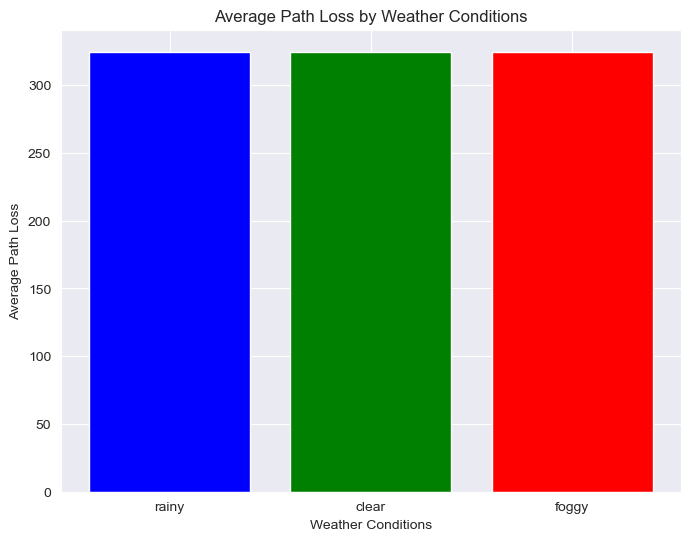

In [56]:
# Average path loss for each weather condition
average_path_loss = [sum(path_loss[i:i+6759]) / 6759 for i in range(0, len(path_loss), 6759)]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(weather_conditions, average_path_loss, color=['blue', 'green', 'red'])
plt.xlabel('Weather Conditions')
plt.ylabel('Average Path Loss')
plt.title('Average Path Loss by Weather Conditions')
plt.grid(True)
plt.show()

7. **Antenna Gain and Signal Strength (Path Loss)**: Investigating how signal strength (path loss) changes with antenna gain can elucidate the role of antenna characteristics in signal reception.

In [58]:
a_gain = list(data['Antenna Gain'])

path_loss = list(data['Path Loss'])

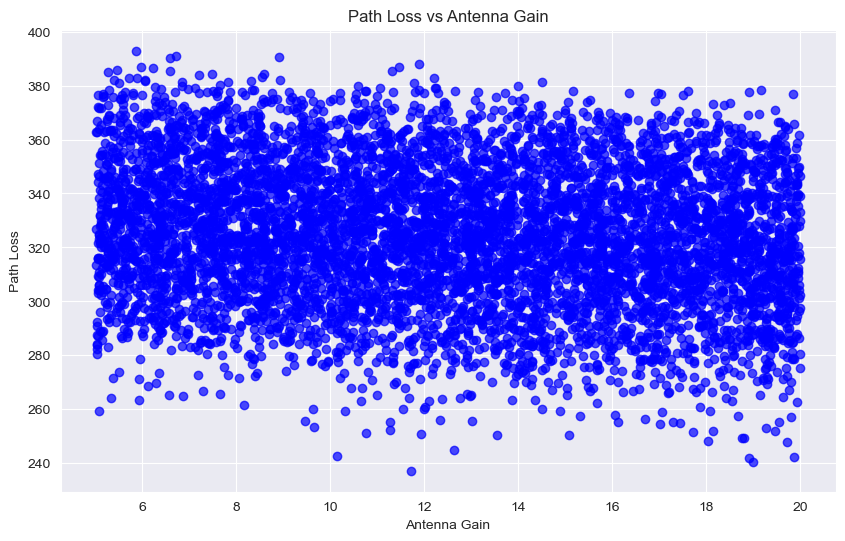

In [61]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(a_gain, path_loss, color='blue', alpha=0.7)
plt.xlabel('Antenna Gain')
plt.ylabel('Path Loss')
plt.title('Path Loss vs Antenna Gain')
plt.grid(True)
plt.show()

The scatter plot visualizes the relationship between antenna gain and path loss. Here's what we can interpret from the plot:

1. **Scatter of Points**: Each point on the plot represents a pair of values: antenna gain on the x-axis and path loss on the y-axis. Each point corresponds to a specific combination of these two variables.

2. **Trend**: By examining the overall distribution of points, we can observe any general trends or patterns. In this case, we're looking to see if there's any noticeable correlation between antenna gain and path loss.

3. **Antenna Gain Variation**: Along the x-axis, the antenna gain values are spread out. This spread indicates the range of different antenna gain values used in the dataset.

4. **Path Loss Variation**: Along the y-axis, the path loss values are also spread out. This spread indicates the range of different path loss values observed for the given antenna gain values.

5. **No Clear Trend**: If the points are randomly scattered without any clear pattern, it suggests that there may not be a strong relationship between antenna gain and path loss in this dataset.

